In [ ]:
import gmpy2 
gmpy2.next_prime(1430),gmpy2.next_prime(750)
import uuid 
uuid.uuid4()
# flag='ctfshow{fa30954b-f66d-4bbc-a71b-c929ddcc460d}'
flag='ctfshow{367db639-9dc4-4f4a-af32-4395ebe046bc}'

flag_text='666c61670ae69c8be58f8befbc8ce4bda0e79bb8e4bfa1e7aba5e8af9de4b988efbc9f0ae79bb8e4bfa1e4bc9ae69c89e4b880e4b8aae7be8ee5a5bde79a84e59cb0e696b90ae982a3e9878ce69c89e6bc82e4baaee79a84e59f8ee5a0a1efbc8ce5b885e6b094e79a84e78e8be5ad90efbc8ce8bf98e69c89e7be8ee4b8bde79a84e5a791e5a8980ae982a3e9878ce79a84e9aa91e5a3abe58b87e695a2e59684e889afefbc8ce4bf9de68aa4e5bcb1e5b08fefbc8c0ae982a3e9878ce79a84e4babae4bbace5ae89e5b185e4b990e4b89aefbc8ce79585e68980e6acb2e8a880e380820ae982a3e9878cefbc8ce69c89e7be8ee4b8bde79a84e5b08fe99587efbc8ce4b883e5bda9e79a84e6b2b3e6b581efbc8ce8bf98e69c89e58e9ae98193e79a84e998bfe78bb80a63746673686f777b33363764623633392d396463342d346634612d616633322d3433393565626530343662637d0ae8afb7e694b6e4b88be998bfe78bb8e79a84e7a4bce789a9efbc8ce79bb8e4bfa1e7be8ee5a5bd2020'
len(flag_text)

In [ ]:
import torchaudio as ta ,torch ,numpy as np ,matplotlib.pyplot as plt ,numpy as np 
wav,cyl = ta.load('z:/ctf/a.mp3')
window = cyl//3
fftw =window//2
mid = (wav[1]+wav[0])*0.4
mid = mid[len(mid)%window:]
plt.figure(figsize=(20,3))
fft_list=[]
for pointer in range(0,len(mid),window):
    fft = (torch.abs(torch.fft.fft(mid[pointer:pointer+window])))[:fftw]
    fft = torch.log2(torch.mean(fft.reshape(75,-1),1)+1) 
    fft_list.append(list(fft[1:61]))
fft_list = np.array(fft_list)
fft_list/=fft_list.max()
fft_list*=100


import cv2 
img_bk=cv2.imread('z:/ctf/bk.png')
bh,bw,_ = img_bk.shape
img_fox = cv2.imread('z:/ctf/fox.png')
img_out = img_bk.copy()
h,w,c = img_fox.shape
M=cv2.getRotationMatrix2D([h/2,w/2] , 1,1)
c = cv2.warpAffine(img_fox, M,dsize=(h,w),flags=cv2.INTER_CUBIC, borderValue=(255,255,255))

M_list=[cv2.getRotationMatrix2D([h/2,w/2] , -i,1) for i in range(0,360,12)] 
fox_out_list=[]
x,y = w//2,bw//2-w//2
for M in M_list:
    fox_out = cv2.warpAffine(img_fox, M,dsize=(h,w), borderValue=(255,255,255))
    bk_out = img_bk.copy()
    bk_out[x:x+h,y:y+w] &=  fox_out
    fox_out_list.append(bk_out) 



In [171]:
io = fox_out_list[0]
i = 0 

fft_list[i]
def dl(img_in,fftlist,pos=0):
    img=img_in.copy()
    # img|=255
    hol=150
    startang=360/16*(pos+4)
    imax = fftlist.argmax()
    cent=(y+w//2,x+h//2)
    for cont in range(len(fftlist)):
        n = (cont+imax)%60
        # print(cont,n)
        ang = np.deg2rad(6*cont+startang)
        start= (int(cent[0]+ (hol+fftlist[n]) * np.sin(ang) ),int(cent[1]+ (hol+fftlist[n]) * np.cos(ang))) 
        end=  (int(cent[0]+ (hol ) * np.sin(ang) ),int(cent[1]+ (hol ) * np.cos(ang))) 
        if  cont==0:
            col=[100,50,255]
        else:
            col=[150,100,(fftlist[n]/fftlist.max()*8)*32]

        cv2.line(img,start,end,col,thickness=2)
    # plt.imshow(img_in)
    return img
# dl(io,fft_list[11],0)

size =(bw,bh)
fourcc = cv2.VideoWriter_fourcc(*'MP4V') 
out = cv2.VideoWriter('z:/ctf/flag.mp4', fourcc, 30.0, size)

import tqdm.notebook as tqdm
for cont in tqdm.trange(len(flag_text)):
    insec = cont%3 
    for i in range(10):
        img=dl(fox_out_list[insec*10+i],fft_list[cont],int(flag_text[cont],16))
        out.write(img)
        # plt.imshow(img)
        # print(img.shape)
out.release()


  0%|          | 0/772 [00:00<?, ?it/s]

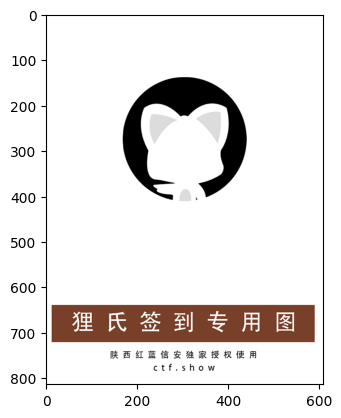

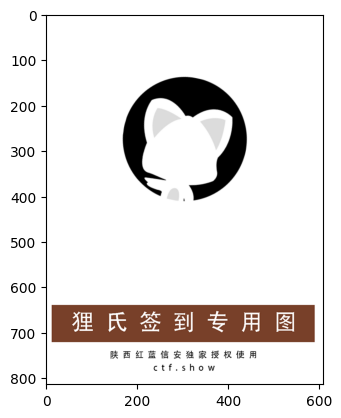

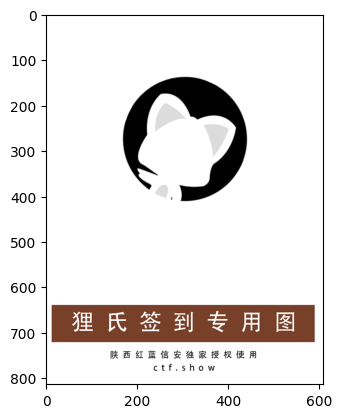

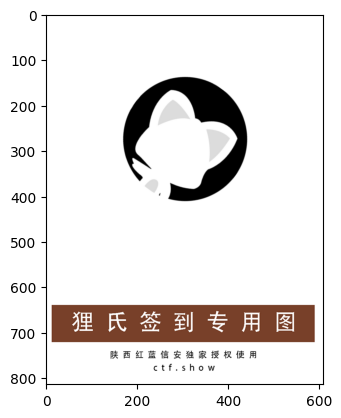

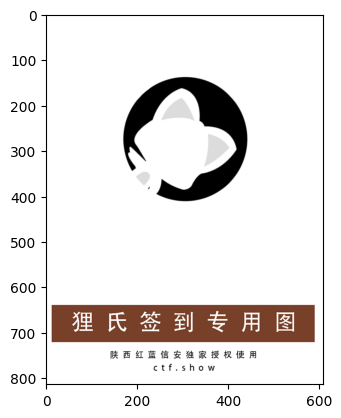

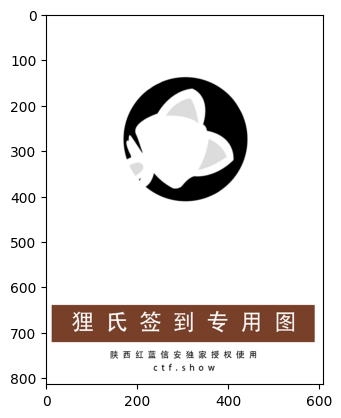

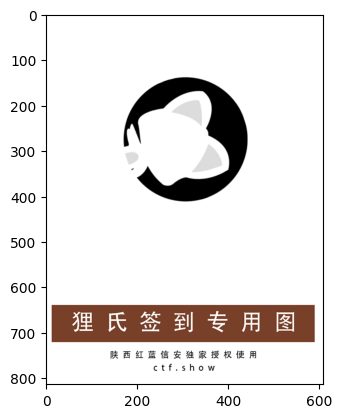

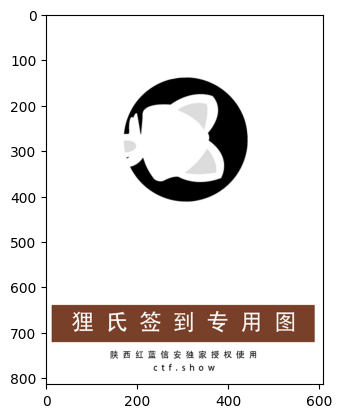

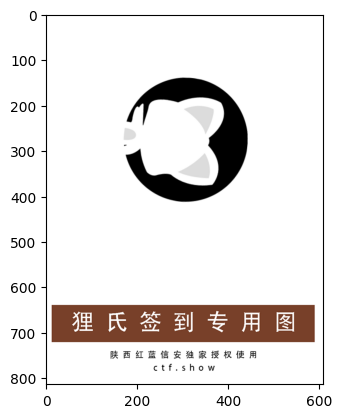

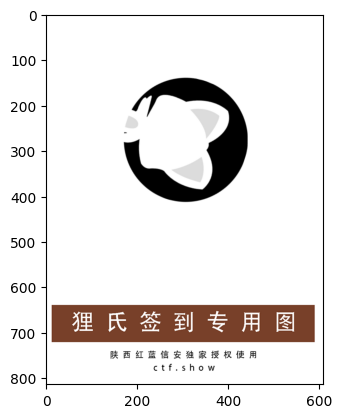

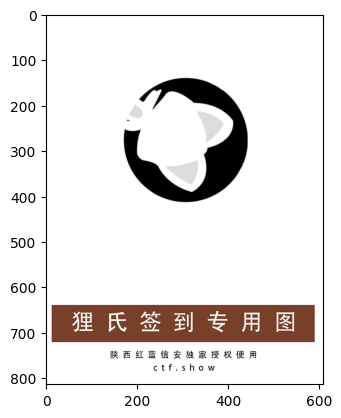

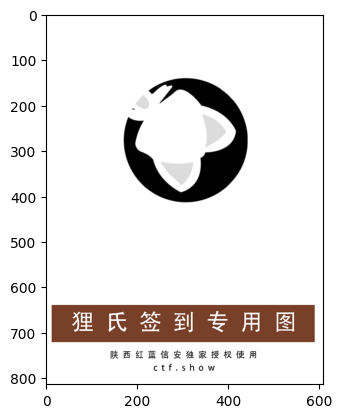

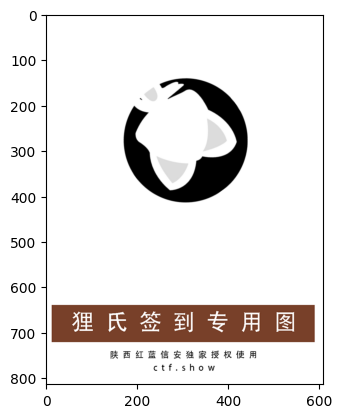

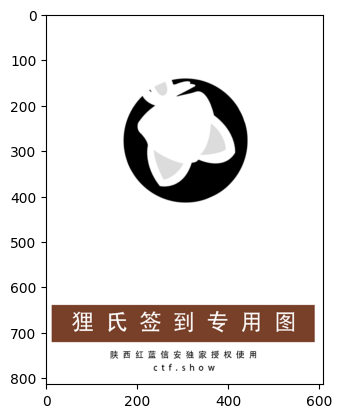

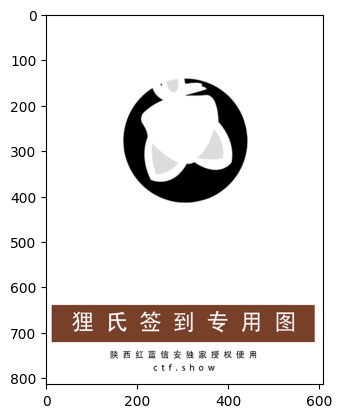

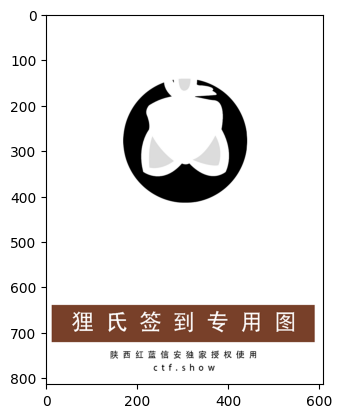

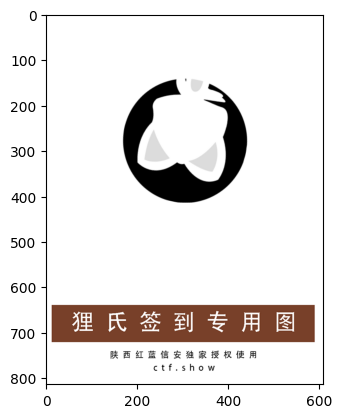

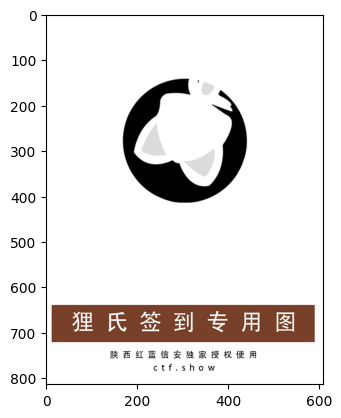

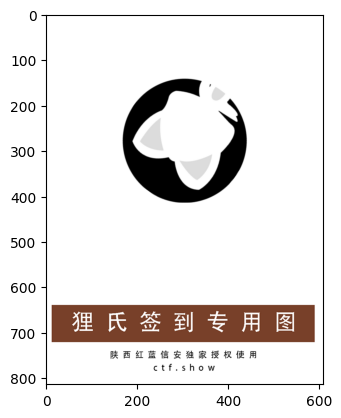

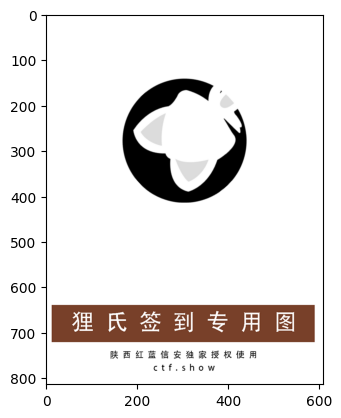

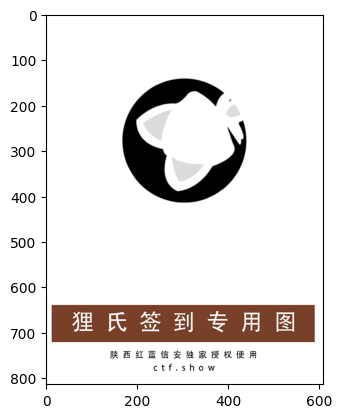

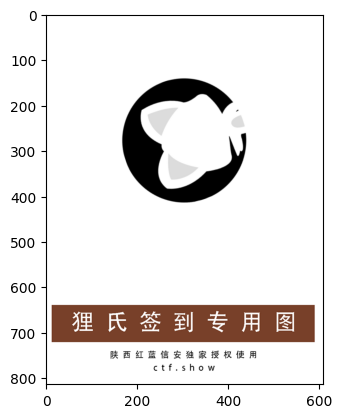

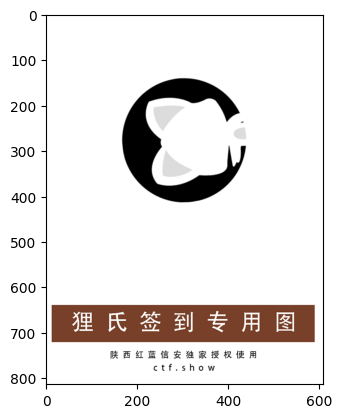

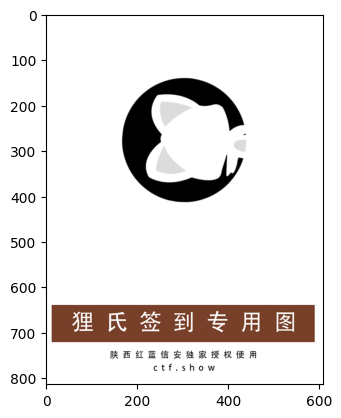

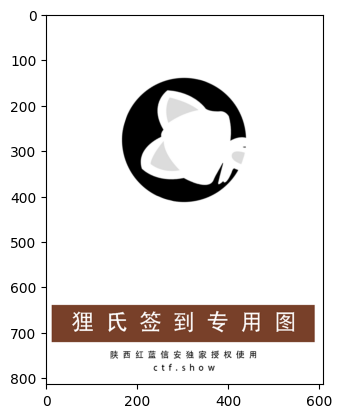

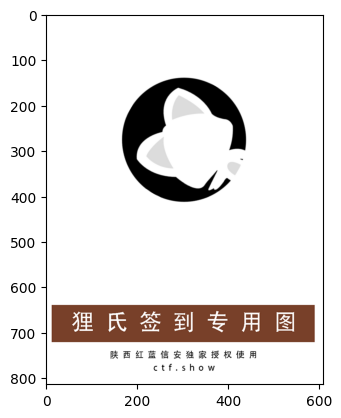

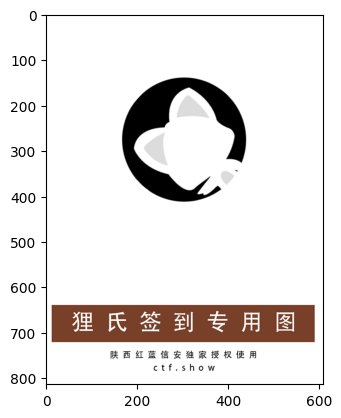

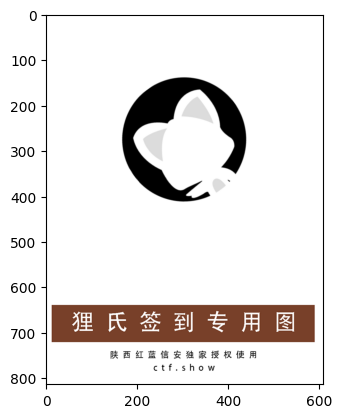

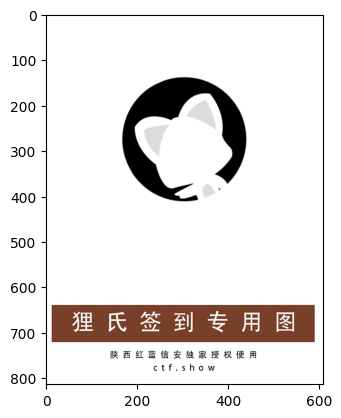

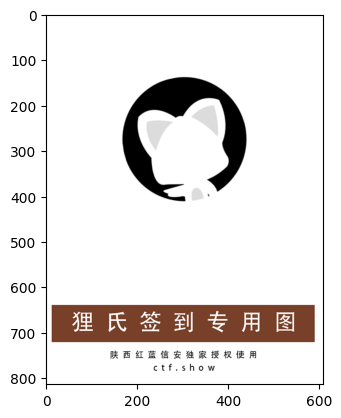

In [224]:
for i in range(30):
    plt.imshow(fox_out_list[i])
    plt.show()